In [1]:
from qiskit import QuantumCircuit, BasicAer, execute, IBMQ, Aer
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter 

provider = IBMQ.load_account()

# Verifying qiskit version

In [2]:
%qiskit_version_table

In [3]:
%qiskit_copyright

In [4]:
## qiskit terra version

print(qiskit.__version__) 

0.19.2


In [5]:
## qiskit full version

print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': '0.3.1', 'qiskit-finance': '0.3.1', 'qiskit-optimization': '0.3.1', 'qiskit-machine-learning': '0.3.1'}


In [6]:
BasicAer.backends()

#Aer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [7]:
#%matplotlib inline

%qiskit_backend_overview

# Open files with QASM

* `QuantumCircuit.from_qasm_file('myfile.qasm')`

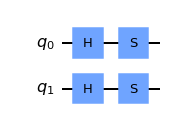

In [8]:
qc_open = QuantumCircuit.from_qasm_file('myfile.qasm')
qc_open.draw('mpl')

# Exporting string with QASM

* `qc.qasm()`
* `QuantumCircuit.from_qasm_str`

In [9]:
temp = QuantumCircuit(2)
temp.h(0)
temp.h(1)
temp.s(0)
temp.s(1)

qasm_str = temp.qasm() #returning a qasm string, THIS SIMPLE
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nh q[0];\nh q[1];\ns q[0];\ns q[1];\n'

In [10]:
qc_open1 = QuantumCircuit.from_qasm_str(qasm_str)
qc_open1 == qc_open

True

# Job Status

In [11]:
#this creates a pop up of your jobs, check it out by running!

%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [12]:
#job status
from qiskit.tools import job_monitor

backend= BasicAer.get_backend('qasm_simulator')
job = execute(qc_open1, backend, shots = 1024)

job_monitor(job)
job.status()

No classical registers in circuit "circuit-11", counts will be empty.


Job Status: job has successfully run


<JobStatus.DONE: 'job has successfully run'>

# Gate and Error maps

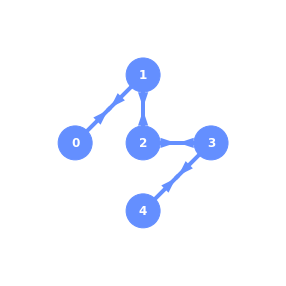

In [13]:
from qiskit.visualization import plot_gate_map, plot_error_map

backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend, plot_directed = True )

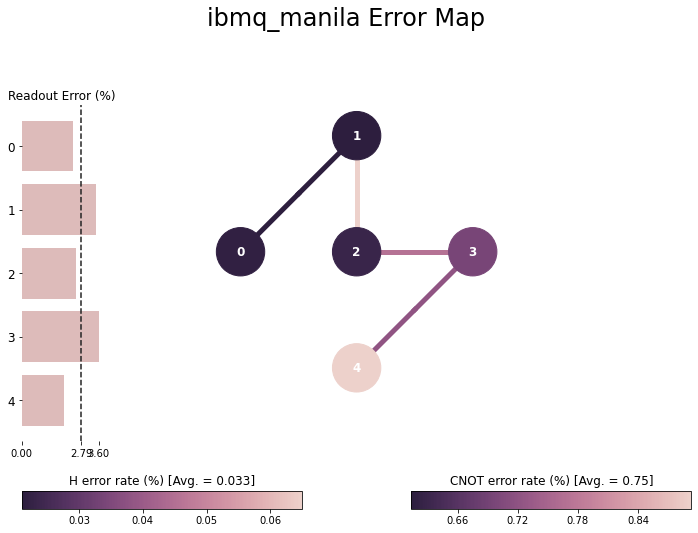

In [14]:
# Plot error map
plot_error_map(backend)